In [5]:
def Process_Incucyte_Data(file_path):
    import pandas
    df = pandas.read_excel(file_path)
    #data clean-up, dropping the "Date Time" column because it's irrelevant in analysis
    df1 = df.drop('Date Time',axis=1)
    
    #Normalizing IncuCyte data by dividing every subsequent confluence value by the first confluence value at hour 0 in each column/treatment condition.
    def divide_by_first_row(column):
        normal = column[0]
        for i in range(len(column)):
            column[i] = column[i]/normal
        return column
    
    #The "Elapsed" column will be used as x-axis/Time
    for col in df1.columns:
        if col != 'Elapsed':
            divide_by_first_row(df1[col])
    
    import matplotlib.pyplot as plt
    plt.close("all")
    
    #Plotting the series with column names of treatment conditions following "Elapsed" as legend
    def plot_graph(dataframe):
        x=dataframe["Elapsed"]
        for col in dataframe.columns:
            if col != 'Elapsed':
                plt.plot(x, dataframe[col])
                plt.legend(dataframe.columns[1:8]) 
                plt.xlabel('Time', fontsize=14)
                plt.ylabel('Fold Change', fontsize=14)
                plt.title('Normalized Fold Change', fontsize=16)
                plt.autoscale(enable=True, axis = 'y')
   
    #Displaying final graph and exporting normalized values as an excel sheet into the same repo
    plot_graph(df1)
    df1.to_excel('normalized_data.xlsx')


<ipython-input-5-b7a9cfc37439>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = column[i]/normal


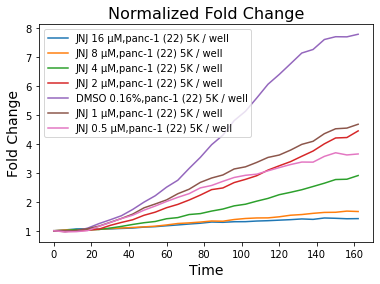

In [6]:
Process_Incucyte_Data('/Users/applehur/Desktop/test1.xlsx')